In [1]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

**Datasets:**

- **BBC News Classification** https://www.kaggle.com/competitions/learn-ai-bbc/overview 

**Sources:**

- https://medium.com/codex/what-is-non-negative-matrix-factorization-nmf-32663fb4d65
- https://www.kaggle.com/code/mattison/unsupervised-matrix-factorization/notebook
- https://machinelearningmastery.com/introduction-to-matrix-decompositions-for-machine-learning/
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

In [2]:
# !pip install nltk
# !pip install turicreate

In [3]:
from numpy import array
from scipy.linalg import lu
from numpy.linalg import qr
from numpy.linalg import cholesky
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import digits
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import itertools
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error

# Matrix Factorization

Matrix decompositions, also known as matrix factorization methods, are approaches that reduce a matrix into its constituent parts, making it simpler to perform more complex matrix operations. They serve as a foundation in linear algebra for various computer applications, including solving systems of linear equations, finding inverses, and determining matrix determinants.

This reduction process enables operations to be performed on the decomposed matrix rather than the original one, akin to factoring numbers like 10 into 2 x 5. Hence, matrix decomposition is often likened to matrix factorization. Much like factoring real values, there exists a multitude of matrix decomposition techniques due to the diverse ways matrices can be decomposed.

Among the commonly used methods are LU matrix decomposition and QR matrix decomposition, both of which are straightforward yet widely applicable.

### LU Matrix Decomposition

The LU decomposition is a numerical technique specifically designed for square matrices, which decomposes a given matrix into lower (L) and upper (U) triangular components.

For a given square matrix A, the LU decomposition expresses it as:

**A = LU**

Where A is the square matrix that we wish to decompose, L is the lower triangle matrix and U is the upper triangle matrix.

The process of obtaining the LU decomposition involves an iterative numerical method. However, it may fail for matrices that are not easily decomposable or not decomposable at all. To address numerical stability issues encountered in practice, an improved variant known as the LUP decomposition (LU decomposition with partial pivoting) is often used. This variant introduces a permutation matrix (P) to reorder the rows of the original matrix, enhancing the decomposition process. Consequently, the LUP decomposition is formulated as:

**A = P . L . U** 

The rows of the parent matrix are re-ordered to simplify the decomposition process and the additional P matrix specifies a way to permute the result or return the result to the original order. There are also other variations of the LU.

Beyond its decomposition utility, LU decomposition finds extensive application in simplifying the solution of linear equation systems, such as those encountered in linear regression, and in computing the determinant and inverse of a matrix.

In Python, the LU decomposition can be effortlessly implemented using the lu() function. Specifically, this function computes an LPU decomposition, where P, L, and U matrices are returned.

The example below first defines a 3×3 square matrix. The LU decomposition is calculated, then the original matrix is reconstructed from the components.

In [4]:
# Define a square matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Display the original matrix
print("Original Matrix A:")
print(A)

# Perform LU decomposition
P, L, U = lu(A)

# Display the components of the LU decomposition
print("\nPermutation Matrix (P):")
print(P)
print("\nLower Triangular Matrix (L):")
print(L)
print("\nUpper Triangular Matrix (U):")
print(U)

# Reconstruct the original matrix from the components
B = P.dot(L).dot(U)
print("\nReconstructed Matrix B:")
print(B)

Original Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Permutation Matrix (P):
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

Lower Triangular Matrix (L):
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]

Upper Triangular Matrix (U):
[[7.         8.         9.        ]
 [0.         0.85714286 1.71428571]
 [0.         0.         0.        ]]

Reconstructed Matrix B:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


### QR Matrix Decomposition

The QR decomposition is a numerical technique suitable for matrices of dimensions m x n (not limited to square matrices), which decomposes a given matrix into two components: Q and R.

**A = QR**

Where A is the matrix that we wish to decompose, Q a matrix with the size m x m, and R is an upper triangle matrix with the size m x n.

The QR decomposition process involves an iterative numerical method, which may encounter difficulties for matrices that are not easily decomposable or not decomposable at all. Despite its potential limitations, the QR decomposition, similar to the LU decomposition, finds utility in solving systems of linear equations, extending its applicability beyond square matrices.

In Python, the QR decomposition can be implemented using the qr() function from NumPy. By default, this function returns the Q and R matrices with reduced dimensions, optimizing computational efficiency. Optionally, to obtain matrices Q and R with dimensions matching the original matrix (m x m for Q and m x n for R), the mode argument can be specified as 'complete', although this is not mandatory for most applications.

The example below defines a 3×2 matrix, calculates the QR decomposition, then reconstructs the original matrix from the decomposed elements.

In [5]:
# Define a 3x2 matrix
A = array([[1, 2], [3, 4], [5, 6]])

# Display the original matrix
print("Original Matrix A:")
print(A)

# Perform QR decomposition
Q, R = qr(A, 'complete')

# Display the components of the QR decomposition
print("\nOrthogonal Matrix (Q):")
print(Q)
print("\nUpper Triangular Matrix (R):")
print(R)

# Reconstruct the original matrix from the decomposed elements
B = Q.dot(R)
print("\nReconstructed Matrix B:")
print(B)

Original Matrix A:
[[1 2]
 [3 4]
 [5 6]]

Orthogonal Matrix (Q):
[[-0.16903085  0.89708523  0.40824829]
 [-0.50709255  0.27602622 -0.81649658]
 [-0.84515425 -0.34503278  0.40824829]]

Upper Triangular Matrix (R):
[[-5.91607978 -7.43735744]
 [ 0.          0.82807867]
 [ 0.          0.        ]]

Reconstructed Matrix B:
[[1. 2.]
 [3. 4.]
 [5. 6.]]


## Cholesky Decomposition

The Cholesky decomposition is specifically designed for square symmetric matrices characterized by all eigenvalues being greater than zero, termed positive definite matrices. In our context within machine learning, we focus solely on real-valued matrices, omitting considerations for complex numbers.

The decomposition is defined as follows:

**A = LL^T**

Where A is the matrix being decomposed, L is the lower triangular matrix and L^T is the transpose of L. 
The decompose can also be written as the product of the upper triangular matrix, for example:

**A = U^T . U**

Where U is the upper triangular matrix.

The Cholesky decomposition finds application in various domains, including solving linear least squares problems like linear regression, as well as in simulation and optimization techniques. Notably, when dealing with symmetric matrices, the Cholesky decomposition demonstrates nearly twice the efficiency of the LU decomposition, rendering it the preferred choice in such scenarios.

In Python, the Cholesky decomposition can be effortlessly implemented using NumPy's cholesky() function. This function returns only the lower triangular matrix L, as the transpose of L (L^T) can be easily obtained when required.

The example below defines a 3×3 symmetric and positive definite matrix and calculates the Cholesky decomposition, then the original matrix is reconstructed.

In [6]:
# Define a 3x3 symmetric and positive definite matrix
A = array([[2, 1, 1], [1, 2, 1], [1, 1, 2]])

# Display the original matrix
print("Original Matrix A:")
print(A)

# Perform Cholesky decomposition
L = cholesky(A)

# Display the lower triangular matrix (L) obtained from the decomposition
print("\nLower Triangular Matrix (L):")
print(L)

# Reconstruct the original matrix from the lower triangular matrix
B = L.dot(L.T)
print("\nReconstructed Matrix B:")
print(B)

Original Matrix A:
[[2 1 1]
 [1 2 1]
 [1 1 2]]

Lower Triangular Matrix (L):
[[1.41421356 0.         0.        ]
 [0.70710678 1.22474487 0.        ]
 [0.70710678 0.40824829 1.15470054]]

Reconstructed Matrix B:
[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]


# Non-Negative Matrix Factorization (NMF)

Non-negative Matrix Factorization (NMF) is a powerful technique for decomposing a non-negative matrix, denoted as X, into two matrices of lower rank, A and B. The multiplication of these matrices, AB, closely approximates X, providing an optimal solution within lower-dimensional spaces. As an unsupervised learning algorithm, NMF plays a crucial role in dimensionality reduction, enabling the transformation of data into more manageable forms for analysis.

NMF finds extensive applications across various domains, notably in recommendation systems, text mining, and image analysis, where it excels at uncovering underlying patterns, topics, and themes within complex datasets. It stands out as a state-of-the-art feature extraction method, particularly beneficial in scenarios characterized by a large number of ambiguous features with limited predictive capability. By identifying and extracting meaningful patterns, NMF enhances our understanding of the data, facilitating the discovery of insightful information that might otherwise remain hidden. This makes NMF invaluable for tasks that require the interpretation of complex, high-dimensional data, providing a more intuitive and interpretable model of the dataset's structure.

NMF uses methods that are derived from multivariate analysis and linear algebra. The algorithm iteratively changes the values of A and B such that their product approaches X. This method keeps the structure of the original data intact and makes sure that both the basis and weights are non-negative. NMF stops when the approximation error converges or a certain number of iterations has reached. It must be initialized with a seed to refer to the starting point for the iterations. This is due to the high dimensionality of the processing space and the fact that there is no global minimization algorithm. Therefore, the appropriate initialization can be critical in getting meaningful outputs. Non-negative Matrix Factorization (NMF) is often used as a preprocessing step for dimensionality reduction in tasks like — classification, clustering, regression, etc. Actually, it can be applied in any situation where the input data matrix has no negative elements.

In [7]:
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [8]:
print('Matrix of Basis Vectors\n', W)

Matrix of Basis Vectors
 [[0.         0.46880684]
 [0.55699523 0.3894146 ]
 [1.00331638 0.41925352]
 [1.6733999  0.22926926]
 [2.34349311 0.03927954]
 [2.78981512 0.06911798]]


In [9]:
print('Matrix of Coefficients\n', H)

Matrix of Coefficients
 [[2.09783018 0.30560234]
 [2.13443044 2.13171694]]


The matrices W and H, obtained as a result of Non-negative Matrix Factorization (NMF), play a central role in data analysis and interpretation. Here is how they can be used:

**Matrix W (Matrix of Basis Vectors)**

- **Feature Extraction:** Each column in the W matrix can be considered as a basis vector or "component" that represents a hidden theme or pattern in the data. In the context of textual data, for example, each column might represent a theme with a set of words that have high weights in this column, indicating their importance for the theme.
- **Dimensionality Reduction:** The W matrix can serve as a compressed representation of the original data in a lower-dimensional space. This is useful for data visualization, clustering, or as input data for subsequent stages of machine learning.

**Matrix H (Matrix of Coefficients)**

- **Feature Contribution:** The H matrix shows how the basis vectors from the W matrix combine to recreate the original data. In the context of texts, for example, the rows of the H matrix can show the contribution of each theme to each document.
- **Classification and Clustering:** Using the weights in the H matrix, documents or images can be classified by dominant themes or clustered based on their thematic composition.


**Application of Matrices W and H** 

- **Theme Analysis:** In text analysis, the columns of the W matrix can be explored to identify key words that characterize each theme, and the rows of the H matrix can be used to analyze the distribution of themes across documents.
- **Recommendation Systems:** In the context of recommendation systems, the W and H matrices can help reveal hidden connections between users and products, allowing for recommendations based on preferences inferred from the data.
- **Grouping and Clustering:** After NMF, clustering algorithms can be applied to the rows of the W matrix or the columns of the H matrix to group similar items (for example, documents with similar themes or users with similar interests).
- **Data Visualization:** The reduced feature space represented by the W matrix can be used for visualizing multidimensional data in 2D or 3D, helping to visually explore the structure and relationships in the data.
- **Building Complex Models:** The W matrix can serve as input data for further modeling, for example, for training classifiers or for deep learning, providing a compact and informative representation of the data.

In the following example, we will consider the application of non-negative matrix factorization method. Our goal will be to divide various news articles into 5 different groups, such as: business, technology, sports, entertainment, and politics.
We will train two models:

An unsupervised model using matrix factorization.
A supervised model using KMeans clustering.
Next, we will compare these models and evaluate their accuracy.

In [10]:
train = pd.read_csv('data/learn-ai-bbc/BBC News Train.csv', encoding="utf-8")
test = pd.read_csv('data/learn-ai-bbc/BBC News Test.csv', encoding="utf-8")
sample_solution = pd.read_csv('data/learn-ai-bbc/BBC News Sample Solution.csv', encoding="utf-8")

### Exploratory Analysis (EDA)

In [11]:
sample_solution.head()

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics


In [12]:
train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [13]:
train.describe()

,ArticleId
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


 All this information look as we expected. We have two object columns and one integer column (for the ID's). It looks like we are not missing any rows. Since the data we are working with is text, we don't need to worry about numbers that are missing such as 9999, 0, etc. Before continuing, I want to make sure that we have no repeated articles in the data. From the code below, we can see that we have 1490 unique IDs and we know the dataframe has 1490 rows, we can assume that each article is unique and continue. I also wanted to see how many categories there are. We can see below that there are five categories in total: business, tech, politics, sport, entertainment.

In [15]:
# check for repeated articles
train['ArticleId'].nunique()

1490

In [16]:
train['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

 We will look at the first row. We can see that the text starts with the header, then has a fairly good amount of text afterwards which would be the article text. We can see that the data has already been preprocessed a bit because there are no uppercase characters. Since these are news articles, we can also assume that there are no spelling mistakes. Capitalization and spelling are two important factors when it comes to natural language processing.  

In [17]:
# first row 
train['Text'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

Now let's visualize the data as much as we can before running some models. We can see that overall we have about even number of entries for each category. This is good because if one or two categories was severely underrepresentated or, in contrast, overrepresentative in the data, then it may cause our model to be biased and/or perform poorly on some or all of the test data.

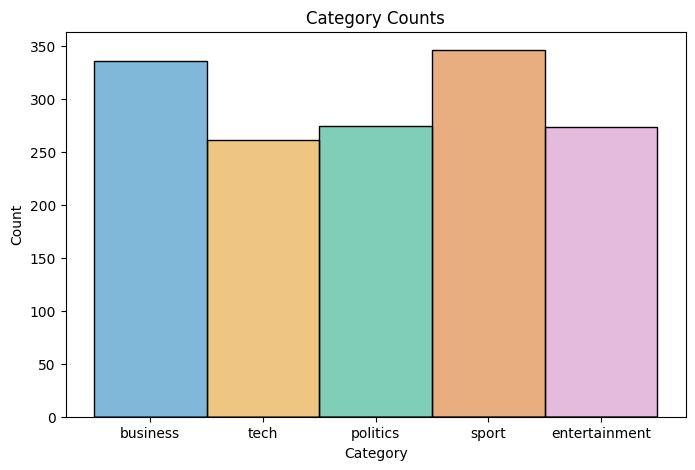

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data = train,
    x = 'Category',
    hue = 'Category',
    palette = 'colorblind',
    legend = False,
    ).set(
        title = 'Category Counts');

While working with text data, it is important to make the text "readable" for the computer. To do this, we will take three steps:

remove punctuation
remove stop words (common English words such as 'to', 'the', 'of', etc)

In [19]:
def clean_text(dataframe, text_col):
    '''
    A helper function which takes a dataframe 
    and removes punction and stopwords.
    '''
    #remove all punctuation
    dataframe['no_punct'] = dataframe[text_col].apply(lambda row: re.sub(r'[^\w\s]+', '', row))
    
    #remove numbers 
    dataframe['no_punct_num'] = dataframe['no_punct'].apply(lambda row: re.sub(r'[0-9]+', '', row))
    
    #remove stopwords
    stop_words = stopwords.words('english')
    dataframe['no_stopwords'] = dataframe['no_punct_num'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    
    #remove extra spaces
    dataframe['clean_text'] = dataframe['no_stopwords'].apply(lambda x: re.sub(' +', ' ', x))
    return 

In [20]:
#clean dataframe text column
clean_text(train, 'Text')

In [21]:
train['clean_text'][1]

'german business confidence slides german business confidence fell february knocking hopes speedy recovery europe largest economy munichbased research institute ifo said confidence index fell february january first decline three months study found outlook manufacturing retail sectors worsened observers hoping confident business sector would signal economic activity picking surprised ifo index taken knock said dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement called dip february ifo confidence figure mild decline said despite retreat index remained relatively high level expected modest economic upswing continue germany economy grew last year shrinking however economy contracted last three months mainly due reluctance consumers spend latest indications growth still proving elusive ifo president hanswerner sinn said improvement german domestic demand sluggish exports kept things going f

After cleaning the dataframe text cells, we will also tokenize and lemmatize the text. Tokenize entails splitting a string of words into a list of words. For example "cat sat on dog" would be converted to ['cat', 'sat', 'on', 'dog']. Tokenizing splits up each word which we can then use later on to train models easier. Next, we will lemmatize the text. We can choose to lemmatize or stem the words.  An example of lemmatizing would be to take the words 'running', 'horses', and 'adjustable', and we lemmatize them to be 'run', 'horse', 'adjust'. This keeps the words general meaning but allows the model to learn better. Additionally, we will ensure that all words are in lowercase form. These cleaning steps mentioned before and here are important because, for example, the computer could look at two sentences such as "Running big reddish dogs." versus "Run big red dog!" and these would be considered different even though they are quite similar. After cleaning, both sentences would be converted to ['run', 'big', 'red', 'dog'] and therefore these two "articles" probably would be classified together, which is the goal of our model.

In [22]:
# tokenize text function
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    ''' 
    A helper function to lemmatize an entire sentence/string
    '''
    lem = [wordnet_lemmatizer.lemmatize(word.lower()) for word in text] 
    return lem

def tokenize_lemmatize(dataframe, text_col):
    '''
    A helper function to tokenize then lemmatize the string.
    Also, add column which counts the number of words in that string.
    '''
    dataframe['tokenized'] = dataframe.apply(lambda row: nltk.word_tokenize(row[text_col]), axis=1)
    dataframe['lemmatized'] = dataframe['tokenized'].apply(lambda string: lemmatizer(string))
    dataframe['num_words'] = dataframe['lemmatized'].apply(lambda lst: len(lst))
    return

In [23]:
tokenize_lemmatize(train, 'clean_text')

After cleaning, we can see (below) the number of words per article. We see most articles are around 200 words. However, we also see we have some severe outliers that reach up to more than 750 words! We actually will remove these outliers as they might actually impact our model later on, in addition to creating more features (words) to have to calculate within the model.

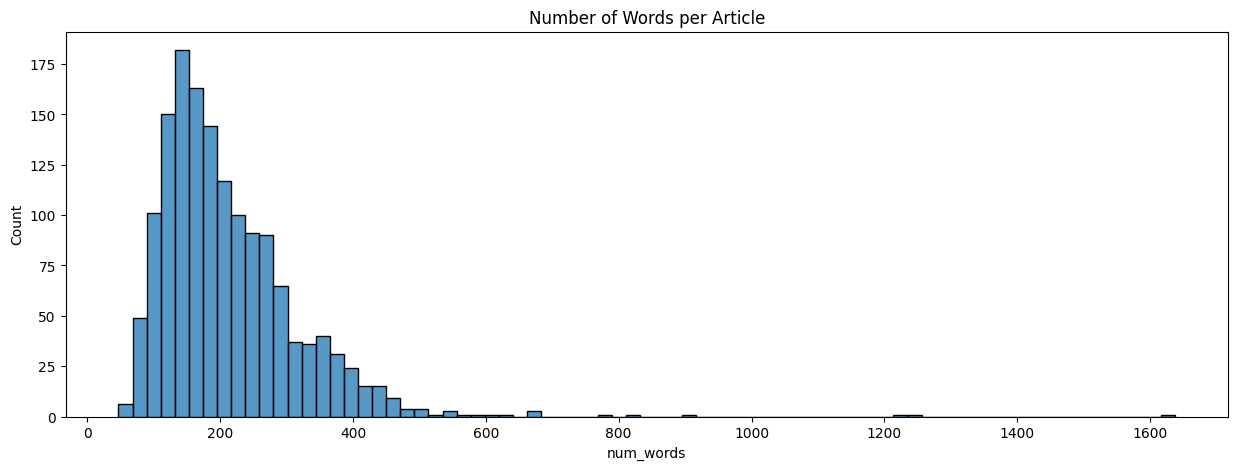

In [24]:
# number of tokens (words) per article
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(
    data = train, 
    x = 'num_words',
    ).set(
        title = 'Number of Words per Article');

In [25]:
# Remove outlier articles (longer than 750 words)
train = train[train['num_words'] < 750]
len(train)

1484

Let's also look at the number of words per category (boxplot below). Per category, we also see quite a few outliers. We will leave these this time. We also see that the mean of each category is similar, with tech and politics having more words, and variance, than the rest of the topics.

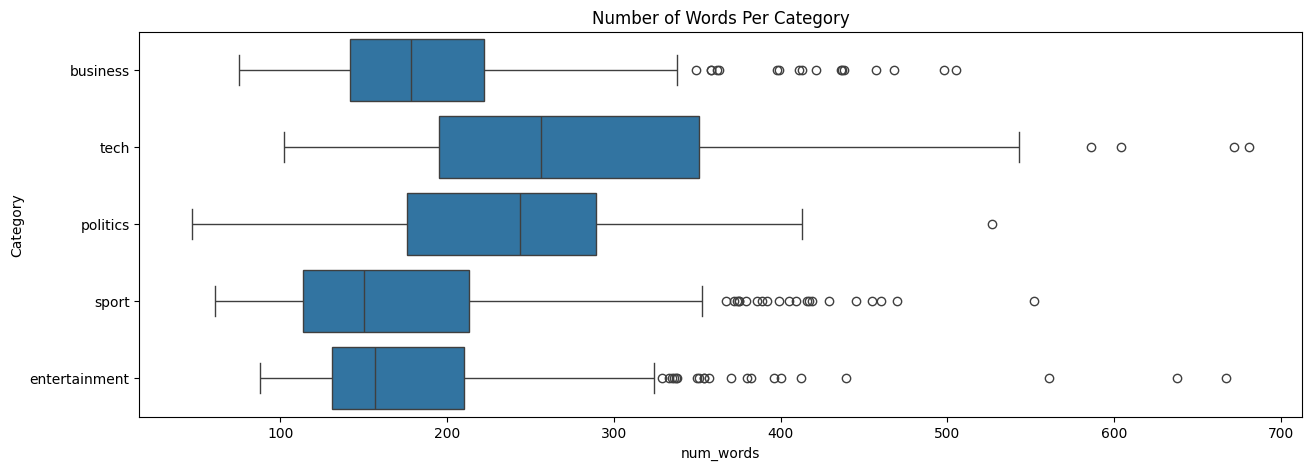

In [26]:
# words per category
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(
    data = train, 
    x = 'num_words', 
    y = 'Category',
    ).set(
        title = 'Number of Words Per Category');

## Model Building and Training

In [27]:
# Create a copy of the training data to avoid modifying the original dataset
train_df = train.copy()

In [28]:
# Function to predict the topics for each document based on weight matrix
def predict(w_matrix):
    # Sort the weights in ascending order for each document
    sortedW = np.argsort(w_matrix)
    
    # Get the number of predictions and the maximum value (index of the highest weight)
    n_predictions, maxValue = sortedW.shape
    
    # Extract the topic with the highest weight for each document
    predictions = [[sortedW[i][maxValue - 1]] for i in range(n_predictions)]
    topics = np.empty(n_predictions, dtype = np.int64)
    
    # Assign the predicted topics to the array
    for i in range(n_predictions):
        topics[i] = predictions[i][0]
    return topics

In [29]:
# Function to find the best mapping of predicted labels to actual categories
def label_permute(ytdf, yp, n=5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
    # Generate all possible permutations of label assignments
    perms = list(itertools.permutations([0, 1, 2, 3, 4]))    
    
    best_labels = []
    best_acc = 0 
    current = {}
    labels = ['business', 'tech', 'politics', 'sport', 'entertainment']
    
    # Iterate over all permutations to find the one with the highest accuracy
    for perm in perms:
        for i in range(n):
            current[labels[i]] = perm[i]
            if len(current) == 5:
                conditions = [
                    (ytdf['Category'] == current['business']),
                    (ytdf['Category'] == current['tech']),
                    (ytdf['Category'] == current['politics']),
                    (ytdf['Category'] == current['sport']),
                    (ytdf['Category'] == current['entertainment'])]
                ytdf['test'] = ytdf['Category'].map(current)
                current_accuracy = accuracy_score(ytdf['test'], yp)
                if current_accuracy > best_acc: 
                    best_acc = current_accuracy
                    best_labels = perm
                    ytdf['best'] = ytdf['test']
    return best_labels, best_acc

In [30]:
# Vectorization of the 'clean_text' column using TF-IDF
tfidvec = TfidfVectorizer(min_df = 2,
                          max_df = 0.95,
                          norm = 'l2',
                          stop_words = 'english')
tfidvec_train = tfidvec.fit_transform(train_df['clean_text'])

# Create and fit an NMF model to the vectorized text data
nmf_model = NMF(n_components=5, 
                init='nndsvda', 
                solver = 'mu',
                beta_loss = 'kullback-leibler',
                l1_ratio = 0.5,
                random_state = 101)
nmf_model.fit(tfidvec_train)

# Predict topics for the training data
yhat_train = predict(nmf_model.transform(tfidvec_train))
# Find the best label permutation and calculate accuracy
label_order, accuracy = label_permute(train_df, yhat_train )
print('Accuracy=', accuracy)

Accuracy= 0.9609164420485176


For this model, using matrix factorization, we found the best combination of parameters as above which resulted in the highest accuracy.

In [31]:
# Show best labels for the trained model 
label_dict = {4:'business', 2:'tech', 1:'politics', 0:'sport', 3:'entertainment'}
for i in range(5):
    print(f'{label_order[i]}:  {label_dict[label_order[i]]}')

4:  business
2:  tech
1:  politics
0:  sport
3:  entertainment


In [32]:
# Clean the text data in the test dataset similar to how the training data was cleaned
clean_text(test, 'Text')

# Transform the cleaned text data in the test set into a TF-IDF matrix using the previously fitted TF-IDF vectorizer.
tfidvec_test = tfidvec.transform(test['clean_text'])

# Use the predict function with the NMF model to get the topic predictions for the test dataset.
yhat_test = predict(nmf_model.transform(tfidvec_test))

In [33]:
test_predictions = pd.DataFrame(columns=['ArticleId', 'Category', 'yhat'])
test_predictions['ArticleId'] = test['ArticleId']
test_predictions['yhat'] = yhat_test
test_predictions['Category'] = test_predictions['yhat'].apply(lambda i: label_dict[i])

# We only need the Article ID and the predicted Category name for each article.
test_predictions = test_predictions.drop('yhat', axis=1)
print(test_predictions.head(15))

    ArticleId       Category
0        1018          sport
1        1319           tech
2        1138          sport
3         459       business
4        1020          sport
5          51          sport
6        2025       politics
7        1479       politics
8          27  entertainment
9         397       business
10       1644       business
11        263           tech
12        765       politics
13       2134           tech
14        297  entertainment


To get the accuracy on the test set, we went ahead and submitted the results from the unsupervised model. Our model got a test accuracy score of 0.96326, or 96.3%. Let's see if we can do even better using a supervised model.

### Model Comparisons
Traditionally, supervised models would perform better with this type of data if we have pre-labeled text, which we do. Therefore, we will compare the unsupervised learning model above to a supervised model below. For good measure, we will re-import the data again since we'll be working with a new model.

In [34]:
# Load training and test datasets
train = pd.read_csv('data/learn-ai-bbc/BBC News Train.csv', encoding="utf-8")
test = pd.read_csv('data/learn-ai-bbc/BBC News Test.csv', encoding="utf-8")

In [35]:
# Clean the text data in the 'Text' column of the training dataset
clean_text(train, 'Text')

# Split the training data into features (X_train) and target labels (y_train)
y_train = train['Category'].values
X_train = train['clean_text'].values

# Initialize a TF-IDF vectorizer and fit it to the cleaned training text data
# This transforms the text into a more manageable, feature-rich numeric form
tfidfvec_supervised = TfidfVectorizer(min_df = 2,
                          max_df = 0.95,
                          norm = 'l2',
                          stop_words = 'english')
tfSuper_train = tfidfvec_supervised.fit_transform(X_train) 

# Create a KMeans clustering model with specified parameters and train it on the vectorized text data
kmeans = KMeans(n_clusters = 5, 
                init = 'k-means++',
                n_init=10, 
                algorithm = 'lloyd', 
                random_state = 101)
yhat_train_super = kmeans.fit_predict(tfSuper_train)

# Assess the accuracy of the clustering model by comparing the predicted labels with actual labels
# Using a custom function to determine the best label permutation for accuracy calculation
y_train_df = pd.DataFrame(y_train, columns=['Category'])
label_order, accuracy = label_permute(y_train_df, yhat_train_super)
print('Accuracy=', accuracy)
print(label_order, '\n')

# Display the order of labels as determined by the clustering model
label_dict = {3:'business', 1:'tech', 4:'politics', 2:'sport', 0:'entertainment'}
for i in range(5):
    print(f'{label_order[i]}:  {label_dict[label_order[i]]}')

Accuracy= 0.8684563758389262
(2, 3, 0, 4, 1) 

2:  sport
3:  business
0:  entertainment
4:  politics
1:  tech


In [36]:
# Repeat cleaning for the test dataset's text data
clean_text(test, 'Text')

# Prepare the test text data for clustering prediction
X_test = test['clean_text'].values

# Use the previously fitted TF-IDF vectorizer to transform the test text data
# (Do not fit the vectorizer again; only transform)
tfSuper_test = tfidfvec_supervised.transform(X_test)

# Predict cluster assignments for the test data
yhat_test = kmeans.predict(tfSuper_test)

# Prepare the DataFrame with Article IDs and predicted categories
test_predictions = pd.DataFrame(columns=['ArticleId', 'Category', 'yhat'])
test_predictions['ArticleId'] = test['ArticleId']
test_predictions['yhat'] = yhat_test
test_predictions['Category'] = test_predictions['yhat'].apply(lambda i: label_dict[i])

# Remove the 'yhat' column as it's no longer needed
test_predictions = test_predictions.drop('yhat', axis=1)

print(test_predictions.head(5))

   ArticleId  Category
0       1018  politics
1       1319  business
2       1138  politics
3        459     sport
4       1020  politics


We first cleaned the training data in common NLP preprocessing ways and explored the data. Then we created a matrix factorization model and got a testing accuracy of 96.3%. We got this score by find-tuning some parameters and using the training accuracy as a guide. The unsupervised model did quite well coompared to the supervised learning model. I suspect the supervised model overfit to the training data, which our unsupervised model did not. We made sure to preprocess the data in the same way for all training and testing runs.

It looks like we got a training accuracy of 86.84% but only a testing accuracy of 62.99%. This suggests that our model is probably overfitting to the training data and does a poor job predicting on new data. If we wanted to train a more powerful supervised learning model, we could use techniques such as ensemble methods and/or cross-validation (Kfold), or different models such as decision tree, random forest, SVM, etc. However, since this class focuses on unsupervised learning techniques, and that is our main focus in this project, we will simply compare our KMeans model to the matrix factorization model.